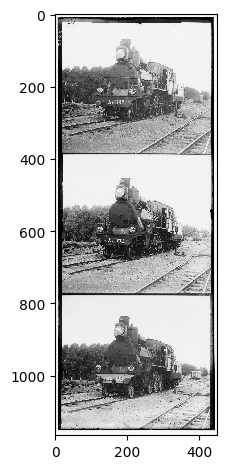

In [16]:
#%matplotlib inline             # просмотр графиков в браузере
import numpy as numpy
# функция просмотра чтения и сохранения
from skimage.io import imread, imshow, imsave
from skimage import img_as_float
from skimage import img_as_ubyte
import skimage as skimage
img = imread ('03.png')
imshow(img)

In [17]:
tri = int (img.shape[0]/3)
five_p = int(img.shape[1]*0.05)
img1 = img_as_float( img [1:tri, :])
img2 = img_as_float( img [tri+1:tri*2, :])
img3 = img_as_float( img [tri*2+1:tri*3, :])
r = img1 [five_p : img1.shape[0]-five_p, five_p:img1.shape[0]-five_p]
g = img2 [five_p : img2.shape[0]-five_p, five_p:img2.shape[0]-five_p]
b = img3 [five_p : img3.shape[0]-five_p, five_p:img3.shape[0]-five_p]

correlation_max = 0
for x in range(-15, 16):
    new_img_x = numpy.roll (b, x, axis = 0)
    for y in range(-15, 16):
        new_img = numpy.roll (new_img_x, y, axis = 1)
        correlation = (new_img*g).sum()
        # print (correlation, x, y )
        if correlation > correlation_max:
            correlation_max = correlation
            row_b = x
            col_b = y

correlation_max = 0
for x in range(-15, 16):
    new_img_x = numpy.roll (r, x, axis = 0)
    for y in range(-15, 16):
        new_img = numpy.roll (new_img_x, y, axis = 1)
        correlation = (new_img*g).sum()
        if correlation > correlation_max:
            correlation_max = correlation
            row_r = x
            col_r = y

In [18]:
def align (img, g_coord):
    
    row_g, col_g = g_coord
    
    tri = int (img.shape[0]/3)
    five_p = int(img.shape[1]*0.1)
    img1 = img_as_float( img [1:tri, :])
    img2 = img_as_float( img [tri+1:tri*2, :])
    img3 = img_as_float( img [tri*2+1:tri*3, :])
    b = img1 [five_p : img1.shape[0]-five_p, five_p:img1.shape[0]-five_p]
    g = img2 [five_p : img2.shape[0]-five_p, five_p:img2.shape[0]-five_p]
    r = img3 [five_p : img3.shape[0]-five_p, five_p:img3.shape[0]-five_p]

    correlation_max = 0
    for x in range(-15, 16):
        new_img_x = numpy.roll (b, x, axis = 0)
        for y in range(-15, 16):
            new_img = numpy.roll (new_img_x, y, axis = 1)
            correlation = (new_img*g).sum()
            # print (correlation, x, y )
            if correlation > correlation_max:
                correlation_max = correlation
                row_b_delta = x
                col_b_delta = y

    correlation_max = 0
    for x in range(-15, 16):
        new_img_x = numpy.roll (r, x, axis = 0)
        for y in range(-15, 16):
            new_img = numpy.roll (new_img_x, y, axis = 1)
            correlation = (new_img*g).sum()
            if correlation > correlation_max:
                correlation_max = correlation
                row_r_delta = x
                col_r_delta = y
    
    row_r = row_g + tri - row_r_delta
    row_b = row_g - tri - row_b_delta
    col_r = col_g - col_r_delta
    col_b = col_g - col_b_delta

    return (row_b, col_b), (row_r, col_r)

In [19]:
row_g = 483
col_g = 218
g_coord = row_g, col_g
print (align (img, (row_g, col_g)))

((99, 219), (866, 215))


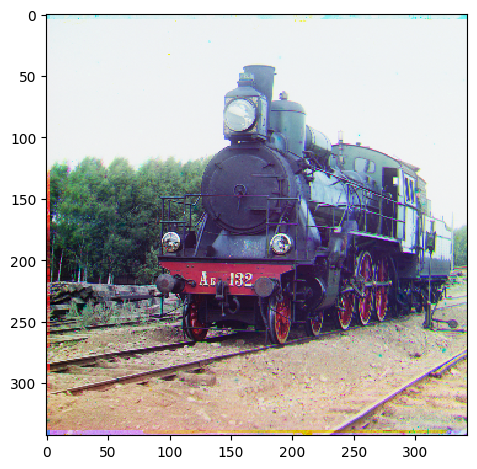

In [20]:

b = numpy.roll (b, row_b, axis = 0)  # 0 - строки
b = numpy.roll (b, col_b, axis = 1)    #1 - стобцы
r = numpy.roll (r, row_r, axis = 0)
r = numpy.roll (r, col_r, axis = 1)
result = img_as_ubyte ( numpy.dstack ((b, g, r)))
imshow (result)